In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
mp_model = mp_hands.Hands(
    static_image_mode=True, # only static images
    max_num_hands=2, # max 2 hands detection
    min_detection_confidence=0.5) # detection confidence

# we are not using tracking confidence as static_image_mode is true.

2023-02-25 13:52:33.005169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-25 13:52:33.135208: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-25 13:52:33.138304: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/stuart/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/cv2/.

In [18]:
image = cv2.imread("raw_data/asl_alphabet_train/asl_alphabet_train/A/A1230.jpg")  # A1230
# now we flip image and convert to rgb image and input to model
# image = cv2.flip(image, 1)

results = mp_model.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

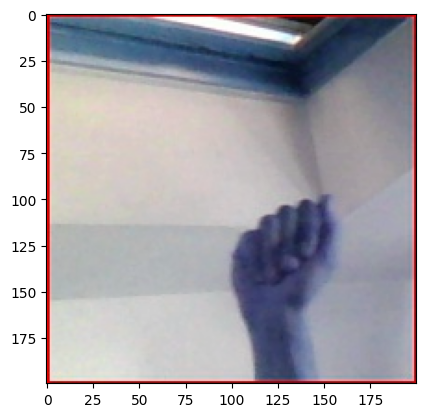

In [19]:
plt.imshow(image)

In [20]:
# crop_img = image[y:y+h, 24:110]
# plt.imshow("cropped", crop_img)

In [21]:
image.shape

(200, 200, 3)

s
(96, 96, 3)


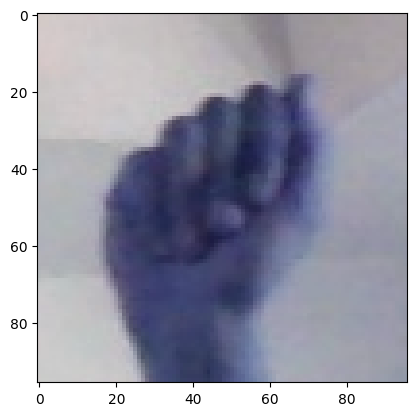

In [22]:
h, w, c = image.shape # get image shape

hand_landmarks = results.multi_hand_landmarks

if hand_landmarks:
    
    print('s')
    for handLMs in hand_landmarks:
        x_max = 0
        y_max = 0
        x_min = w
        y_min = h
        for lm in handLMs.landmark:
            x, y = int(lm.x * w), int(lm.y * h)
            if x > x_max:
                x_max = x
            if x < x_min:
                x_min = x
            if y > y_max:
                y_max = y
            if y < y_min:
                y_min = y
        y_min -= 20
        y_max += 20
        x_min -= 20
        x_max += 20

        x_diff = x_max - x_min
        y_diff = y_max - y_min
        
        if y_diff > x_diff:

            length_diff =  y_diff - x_diff

            half_length_diff_max = round(length_diff/2)
            half_length_diff_min = length_diff-half_length_diff_max

            x_max = half_length_diff_max + x_max
            x_min = x_min - half_length_diff_min

        if x_diff > y_diff:
            length_diff =  x_diff -  y_diff

            half_length_diff_max = round(length_diff/2)
            half_length_diff_min = length_diff-half_length_diff_max

            y_max = half_length_diff_max + y_max
            y_min = y_min - half_length_diff_min

        crop_img = image[y_min:y_max, x_min:x_max]
        print(crop_img.shape)

    plt.imshow(crop_img)

else:
    pass
#plt.imshow(image)

In [23]:
def make_image_square(x_max, x_min, y_max, y_min):
    '''used in below'''
    x_diff = x_max - x_min
    y_diff = y_max - y_min

    if y_diff > x_diff:

        length_diff =  y_diff - x_diff

        half_length_diff_max = round(length_diff/2)
        half_length_diff_min = length_diff-half_length_diff_max

        x_max = half_length_diff_max + x_max
        x_min = x_min - half_length_diff_min


    elif x_diff > y_diff:
        length_diff =  x_diff -  y_diff

        half_length_diff_max = round(length_diff/2)
        half_length_diff_min = length_diff-half_length_diff_max

        y_max = half_length_diff_max + y_max
        y_min = y_min - half_length_diff_min

    
    return x_max, x_min, y_max, y_min

In [24]:
def crop_image(image):
    
    results = mp_model.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    h, w, c = image.shape # get image shape

    hand_landmarks = results.multi_hand_landmarks

    if hand_landmarks:
            for handLMs in hand_landmarks:
                x_max = 0
                y_max = 0
                x_min = w
                y_min = h
                for lm in handLMs.landmark:
                    x, y = int(lm.x * w), int(lm.y * h)
                    if x > x_max:
                        x_max = x
                    if x < x_min:
                        x_min = x
                    if y > y_max:
                        y_max = y
                    if y < y_min:
                        y_min = y
                y_min -= 20
                y_max += 20
                x_min -= 20
                x_max += 20
                
    x_max, x_min, y_max, y_min = make_image_square(x_max, x_min, y_max, y_min)
    
    crop_img = image[y_min:y_max, x_min:x_max]
    
    else:
        pass
            
    return crop_img
    

SyntaxError: invalid syntax (2906735468.py, line 33)

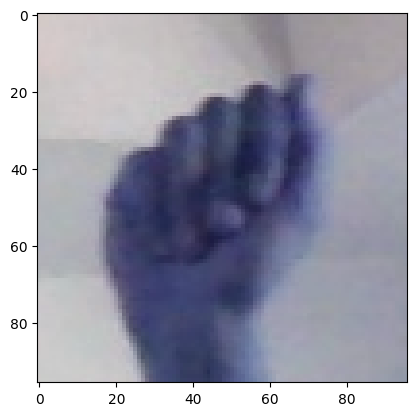

In [9]:
plt.imshow(crop_image(image));